### Data Gathering

# Downloading from websites





In [1]:
!pip install beautifulsoup4
!pip install furl
!pip install html-table-parser-python3

from datetime import datetime, timedelta, date
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import urllib.request
from pprint import pprint
from html_table_parser.parser import HTMLTableParser
import requests
import json
import os
from google.colab import drive
from pandas.core.generic import DataFrameFormatter
from numpy.core.fromnumeric import reshape
from pandas.core.arrays import period
from pandas.core.generic import DataFrameFormatter
from numpy.core.fromnumeric import reshape
import xml.etree.ElementTree as ET
from google.colab import data_table
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense



todays_date = date.today()

################################################
###Brent Crude oil Price
def Brent():
  #Fetching the bulk data from website  and reorganizing on to google drive
  import requests
  import json
  import os
  import pandas as pd
  from google.colab import drive
  drive.mount('/content/drive')
  Gh1files=[]
  json_path = f"{os.getcwd()}\\JSON"
  url = " https://api.eia.gov/v2/petroleum/pri/spt/data/?frequency=daily&data[0]=value&facets[series][]=RBRTE&start=1995-01-01&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000&api_key=7e361b53e231aaf90ac6dcd91c0dc07d"
  headers = {"api_key":"7e361b53e231aaf90ac6dcd91c0dc07d","host":"api.eia.gov"}

  # Change ticker symbol in the query string in each loop
  #while loop
  year = 2002
  while year < todays_date.year:
    year += 1

    querystring={'frequency':'daily','data[0]':'value','start':f'{year}-01-01','end':f'{year}-12-31','offset':'0','length':'5000'}
  # print(f"year = {year}")



      # Get a new request in every loop
    response = requests.request("GET", url, headers=headers, params=querystring)
    #print(f"Done request {year} data")

      # Write the response into a JSON file in the JSON folder
    with open(f"/content/drive/MyDrive/deep learning codes/EIAAPI_DOWNLOAD/{year}prices1_year.json", "w") as outfile:
      json.dump(response.json(), outfile)


    #concantenating files
    Gh1files.append(response.json())

    dff = pd.DataFrame(Gh1files)

  else:

      # Output message to indicate the loop is complete
   # print(f"Wrote all symbols to JSON file")

    print(dff)

  file =open(f"/content/drive/MyDrive/deep learning codes/EIAAPI_DOWNLOAD/solutions/mergedata/Mergeddata1.json", "w")
  for item in Gh1files:
      file.write(f"{item}'\n'")
  file.close()

  #########################################################################################################################################


  #Fetching Data and Reorganizing it from google drive

  from pandas.core.generic import DataFrameFormatter
  from numpy.core.fromnumeric import reshape
  from pandas.core.arrays import period
  from datetime import datetime
  import requests
  import json
  import os
  import pandas as pd
  import numpy as np
  from google.colab import drive
 # drive.mount('/content/drive')
  DData=[]
  DD=[]
  serK=[]
  serH=[]
  serr=[]
  serrr=[]
  ser=[]
  Price=[]
  year = 2002
  while year < todays_date.year:
    year += 1

    ppperiod=[]
    vvvvalue=[]
    # Open the prices.json file
    with open(f"/content/drive/MyDrive/deep learning codes/EIAAPI_DOWNLOAD/{year}prices1_year.json") as file:
      # Load its content and make a new dictionary
        DData=json.load(file)
        for response in DData:
          DDData=(DData["response"])

          for data in DDData:
            KK=[]
            hh=[]

            DDDData=(DDData["data"])
            length = len(DDDData)
            l=[]
            i=0
            while i < length:
              v=[]
              p=[]
              k=DDDData[i]
              v=k['value']

              pp=(k['period'])
              p=datetime.strptime(pp,'%Y-%m-%d').date()

              KK.append(p)
              hh.append(v)
              i+=1
        serK.append(KK)
        serH.append(hh)
  flat_list1 = []
  for sublist in serH:
          for item in sublist:
            flat_list1.append(item)
  flat_list = []
  for sublist in serK:
          for item in sublist:
            flat_list.append(item)
  else:
    BrentPrice = list(zip(flat_list,np.float16(flat_list1)))
    BrentPrice=pd.DataFrame(BrentPrice)


    BrentPrice.columns=['Date','Brent']
    BrentPrice['Date']=pd.to_datetime(BrentPrice['Date'],infer_datetime_format=True)
    BrentPrice.index=BrentPrice['Date']
    BrentPrice.sort_index

  BBrentPrice=pd.date_range(start=f'{(BrentPrice["Date"]).min()}', end=f'{BrentPrice["Date"].max()}', periods=None, freq="D", tz=None, normalize=False, name=None, inclusive='both')
  BBrentPrice=pd.DataFrame(BBrentPrice)
  BBrentPrice.columns=['Date']
  BBrentPrice.index=BBrentPrice['Date']
  BBBrentPrice=pd.concat([BBrentPrice['Date'], BrentPrice['Brent']], axis=1, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=True, sort=True, copy=None)
  #BBBrentPrice.ffillna()
  BBBrentPrice.index=pd.to_datetime(BBBrentPrice.index,format='%Y-%m-%d',infer_datetime_format=True)
  recentBBBBrentPrice=BBBrentPrice.index[-1]
  print(BBBrentPrice)
  return BBBrentPrice
########################################################################################################
###  DATA
def USSDR():

    !pip install beautifulsoup4
    !pip install furl
    !pip install html-table-parser-python3


    from datetime import datetime, timedelta, date
    import numpy as np
    import pandas as pd
    from sklearn import linear_model
    import matplotlib.pyplot as plt
    from sklearn.linear_model import LinearRegression
    import urllib.request
    from pprint import pprint
    from html_table_parser.parser import HTMLTableParser




    def url_get_contents(url):

      # Opens a website and read its
      # binary contents (HTTP Response Body)

      #making request to the website
      req = urllib.request.Request(url=url)
      f = urllib.request.urlopen(req)

      #reading contents of the website
      return f.read()

    ############
    from datetime import datetime, timedelta, date
    today = date.today()

    # initializing dates
    test_date =today

    # getting difference
    diff = 1
    if test_date.weekday() == 0:
        diff = 3
    elif test_date.weekday() == 6:
        diff = 2
    else :
        diff = 1

    # subtracting diff
    res = test_date - timedelta(days=diff)
    # printing result

    #############
    z=[f"{res}"]
    zy=[0]
    zz=list(zip (z,zy))
    zz=pd.DataFrame(zz)
    zz.set_index(zz[0])
    zz[0]=pd.to_datetime(zz[0])
    zz[0]=zz[0].astype(int)
    xxx=zz[0].values.reshape(1, -1)

    b=['2023-6-30','2002-7-20','2001-8-7','2000-12-18','1999-5-19']
    a=[638237000000000000,631628000000000000,631328000000000000,631128000000000000,630628000000000000]
    bb=list(zip (b,a))
    bb=pd.DataFrame(bb)
    bb[0]=pd.to_datetime(bb[0])
    bb[0]=bb[0].astype(int)

    x = bb[0].values.reshape(-1,1)
    y = bb[1].values.reshape(-1,1)
    bb.set_index(bb[0])
    reg = LinearRegression()
    reg.fit(x, y)
    xxxx=[]
        # Predict using the model
    zz[1] = reg.predict(xxx)

    xxxx=zz.iloc[0,1].astype(int)
 #631770624000000000&To=638381952000000000
    ##############
    from furl import furl

    f=furl('https://www.imf.org/external/np/fin/ert/GUI/Pages/Report.aspx?CT=%27USA%27&EX=SDRC&P=DateRange&Fr=631770624000000000&To=638318016000000000&CF=Compressed&CUF=Period&DS=Ascending&DT=Blank')
    f.args["To"] = {f'{xxxx}'}
    f.url
  # print(f.url)
    # defining the html contents of a URL.
    xhtml = url_get_contents(f.url).decode('utf-8')

    # Defining the HTMLTableParser object
    p = HTMLTableParser()

    # feeding the html contents in the
    # HTMLTableParser object
    p.feed(xhtml)

    # Now finally obtaining the data of
    # the table required
    #pprint(p.tables[15])

    # converting the parsed data to
    # dataframe


    sdrusd=pd.DataFrame(p.tables[15])
    sdrusd=sdrusd.iloc[2:]

    sdrusd.columns=sdrusd.iloc[1]

    s=sdrusd.iloc[0:,0]

    s=pd.to_datetime(s,infer_datetime_format=True)
    ps=sdrusd.iloc[0:,1]
    sdrusd=list(zip(s,ps))
    sdrusd=pd.DataFrame(sdrusd)
    sdrusd.columns=['Date','USD_SDR']
    sdrusd.index=sdrusd['Date']

    ssdrusd=pd.date_range(start=f'{(sdrusd["Date"]).min()}', end=f'{sdrusd["Date"].max()}', periods=None, freq="D", tz=None, normalize=False, name=None, inclusive='both')
    ssdrusd=pd.DataFrame(ssdrusd)
    ssdrusd.columns=['Date']
    ssdrusd.index=ssdrusd['Date']
    sssdrusd=pd.concat([ssdrusd['Date'], sdrusd['USD_SDR']], axis=1, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=True, sort=True, copy=None)
    sssdrusd.index=pd.to_datetime(sssdrusd.index,format='%Y-%m-%d',infer_datetime_format=True)
    sssdrusd.sort_index
   # sssdrusd.fillna(axis=1, method='ffill', inplace=True)
    print(sssdrusd)
    return sssdrusd

#####################################################################################################
###WTI Crude oil *Price*

def WTI():
  #Fetching the bulk data from website  and reorganizing on to google drive
  import requests
  import json
  import os
  import pandas as pd
  from google.colab import drive
  #drive.mount('/content/drive')
  Gh1files=[]
  json_path = f"{os.getcwd()}\\JSON"
  url = "https://api.eia.gov/v2/petroleum/pri/spt/data/?frequency=daily&data[0]=value&facets[series][]=RWTC&start=1995-01-01&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000&api_key=7e361b53e231aaf90ac6dcd91c0dc07d"
  headers = {"api_key":"7e361b53e231aaf90ac6dcd91c0dc07d","host":"api.eia.gov"}

  # Change ticker symbol in the query string in each loop
  #while loop
  year = 2002
  while year < todays_date.year:
    year += 1

    querystring={'frequency':'daily','data[0]':'value','start':f'{year}-01-01','end':f'{year}-12-31','offset':'0','length':'5000'}
  # print(f"year = {year}")



      # Get a new request in every loop
    response = requests.request("GET", url, headers=headers, params=querystring)
   #print(f"Done request {year} data")

      # Write the response into a JSON file in the JSON folder
    with open(f"/content/drive/MyDrive/deep learning codes/EIAAPI_DOWNLOAD/{year}pricesWTI_year.json", "w") as outfile:
      json.dump(response.json(),outfile)


    #concantenating files
    Gh1files.append(response.json())

    dff = pd.DataFrame(Gh1files)



  else:
      # Output message to indicate the loop is complete
    print(f"Wrote all symbols to JSON file")
    #print(dff)
  file =open(f"/content/drive/MyDrive/deep learning codes/EIAAPI_DOWNLOAD/solutions/mergedata/WTIMergeddata1.json", "w")
  for item in Gh1files:
      file.write(f"{item}'\n'")
  file.close()
  ####################################################################################################################
  #Fetching Data and Reorganizing it from google drive
  from pandas.core.generic import DataFrameFormatter
  from numpy.core.fromnumeric import reshape
  from pandas.core.arrays import period
  from datetime import datetime
  import json
  import requests
  import os
  import pandas as pd
  import numpy as np
  from google.colab import drive
  #drive.mount('/content/drive')
  DData=[]
  DD=[]
  serK=[]
  serH=[]
  serr=[]
  serrr=[]
  ser=[]
  Price=[]
  year = 2002
  while year < todays_date.year:
    year += 1

    ppperiod=[]
    vvvvalue=[]

    # Open the prices.json file
    with open(f"/content/drive/MyDrive/deep learning codes/EIAAPI_DOWNLOAD/{year}pricesWTI_year.json") as file:

      # Load its content and make a new dictionary
        DData=json.load(file)
        for response in DData:
          DDData=(DData["response"])

          for data in DDData:
            KK=[]
            hh=[]

            DDDData=(DDData["data"])
            length = len(DDDData)
            l=[]
            i=0
            while i < length:
              v=[]
              p=[]
              k=DDDData[i]
              v=k['value']

              pp=(k['period'])
              p=datetime.strptime(pp,'%Y-%m-%d').date()

              KK.append(p)
              hh.append(v)
              i+=1
        serK.append(KK)
        serH.append(hh)
  flat_list1 = []
  for sublist in serH:
          for item in sublist:
            flat_list1.append(item)
  flat_list = []
  for sublist in serK:
          for item in sublist:
            flat_list.append(item)
  else:
    WTIPrice = list(zip(flat_list, np.float16(flat_list1)))
    WTIPrice=pd.DataFrame(WTIPrice)
    WTIPrice.columns=['Date','WTI']
    WTIPrice['Date']=pd.to_datetime(WTIPrice['Date'],infer_datetime_format=True)
    WTIPrice.index=WTIPrice['Date']

    WWTIPrice=pd.date_range(start=f'{(WTIPrice["Date"]).min()}', end=f'{WTIPrice["Date"].max()}', periods=None, freq="D", tz=None, normalize=False, name=None, inclusive='both')
    WWTIPrice=pd.DataFrame(WWTIPrice)
    WWTIPrice.columns=['Date']
    WWTIPrice.index=WWTIPrice['Date']
    WWWTIPrice=pd.concat([WWTIPrice['Date'], WTIPrice['WTI']], axis=1, join='outer', ignore_index=False, keys=None, levels=None, names=None, verify_integrity=True, sort=True, copy=None)

    WWWTIPrice.index=pd.to_datetime(WWWTIPrice.index, format='%Y-%m-%d', infer_datetime_format=True)

  recentWWWWTIPrice=WWWTIPrice.index[-1]
  print(WWWTIPrice)
  return WWWTIPrice

#AWTI.fillna(axis=0, method='ffill', limit=None, inplace=True)
###########################################################################
###OPEC Crude oil *Price*
##OPEC Crude oil *Price*
def OPEC():
  import datetime
  from datetime import datetime
  import requests
  import xml.etree.ElementTree as ET
  from bs4 import BeautifulSoup
  import numpy as np
  import pandas as pd
  import json
  from google.colab import data_table
  from google.colab import drive
  #drive.mount('/content/drive')
  sheet_name = 'opec' # replace with your own sheet name
  sheet_id = '1ML1BMS1rOpj7x6yfBiiVmjpmyEik9SNF' # replace with your sheet's ID
  url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
  OPECPrice = pd.read_csv(url)


  #OPECPrice.index=OPECPrice.columns[1]
  #OPECPrice=OPECPrice.drop.

  OPECPrice.columns=['Date','OPEC']

  OPECPrice['Date']=pd.to_datetime(OPECPrice['Date'])
  OPECPrice=OPECPrice.set_index('Date')
  return OPECPrice
#########################################################
### Fuel Daily Price
def Fuel_Daily():
  #Fetching the bulk data from website  and reorganizing on to google drive
  import requests
  import json
  import os
  import pandas as pd
  from google.colab import drive
  #drive.mount('/content/drive')

  Gh1files=[]
  json_path = f"{os.getcwd()}\\JSON"
  url = "https://api.eia.gov/v2/petroleum/pri/spt/data/?frequency=daily&data[0]=value&facets[series][]=EER_EPD2DC_PF4_Y05LA_DPG&facets[series][]=EER_EPD2DXL0_PF4_RGC_DPG&facets[series][]=EER_EPD2DXL0_PF4_Y35NY_DPG&facets[series][]=EER_EPD2F_PF4_Y35NY_DPG&facets[series][]=EER_EPJK_PF4_RGC_DPG&facets[series][]=EER_EPLLPA_PF4_Y44MB_DPG&facets[series][]=EER_EPMRR_PF4_Y05LA_DPG&facets[series][]=EER_EPMRU_PF4_RGC_DPG&facets[series][]=EER_EPMRU_PF4_Y35NY_DPG&start=1995-01-01&sort[0][column]=period&sort[0][direction]=desc&offset=0&length=5000&api_key=7e361b53e231aaf90ac6dcd91c0dc07d"
  headers = {"api_key":"7e361b53e231aaf90ac6dcd91c0dc07d","host":"api.eia.gov"}
  # Change ticker symbol in the query string in each loop
  #while loop
  year = 2002
  while year <= todays_date.year:


    querystring={'frequency':'daily','data[0]':'value','start':f'{year}-01-01','end':f'{year}-12-31','offset':'0','length':'5000'}
  # print(f"year = {year}")

      # Get a new request in every loop
    response = requests.request("GET", url, headers=headers, params=querystring)
  #print(f"Done request {year} data")

      # Write the response into a JSON file in the JSON folder
    with open(f"/content/drive/MyDrive/deep learning codes/EIAAPI_DOWNLOAD/{year}pricesFuel_year.json", "w") as outfile:
      json.dump(response.json(),outfile)

    #concantenating files
    Gh1files.append(response.json())

    dff = pd.DataFrame(Gh1files)


    year += 1
  else:

    file =open(f"/content/drive/MyDrive/deep learning codes/EIAAPI_DOWNLOAD/solutions/mergedata/FuelMergeddata1.json", "w")
  for item in Gh1files:
      file.write(f"{item}'\n'")
  file.close()


  ####################################################################################################################################
  #Fetching Data and Reorganizing it from google drive
  from pandas.core.generic import DataFrameFormatter
  from numpy.core.fromnumeric import reshape
  from pandas.core.arrays import period
  from datetime import datetime
  import pandas as pd
  import json
  import requests
  import os
  import numpy as np
  from google.colab import drive
  #drive.mount('/content/drive')
  DData=[]
  DD=[]
  serK=[]
  serH=[]
  serT=[]
  serr=[]
  serrr=[]
  ser=[]
  year = 2002
  while year < todays_date.year:
    year += 1
    ppperiod=[]
    vvvvalue=[]

    # Open the prices.json file
    with open(f"/content/drive/MyDrive/deep learning codes/EIAAPI_DOWNLOAD/{year}pricesFuel_year.json") as file:

      # Load its content and make a new dictionary
        DData=json.load(file)
        for response in DData:
          DDData=(DData["response"])

          for data in DDData:
            KK=[]
            hh=[]
            ttt=[]

            DDDData=(DDData["data"])
            length = len(DDDData)
            l=[]
            i=0
            while i < length:
              v=[]
              p=[]
              k=DDDData[i]
              v=k['value']

              pp=(k['period'])
              p=datetime.strptime(pp,'%Y-%m-%d').date()

              tt=(k['series'])

              KK.append(p)
              hh.append(v)
              ttt.append(tt)

              i+=1
        serK.append(KK)
        serH.append(hh)
        serT.append(ttt)
  flat_list=[]
  for sublist in serH:
          for item in sublist:
            flat_list.append(item)
  flat_list1 = []
  for sublist in serK:
          for item in sublist:
            flat_list1.append(item)
  flat_list2 = []
  for sublist in serT:
          for item in sublist:
            flat_list2.append(item)
  else:
      Price=[]
      Date=[]
      EER_EPD2DC_PF4_Y05LA_DPG=[]
      EER_EPD2DXL0_PF4_RGC_DPG=[]
      EER_EPD2DXL0_PF4_Y35NY_DPG=[]
      EER_EPD2F_PF4_Y35NY_DPG=[]
      EER_EPJK_PF4_RGC_DPG=[]
      EER_EPLLPA_PF4_Y44MB_DPG=[]
      EER_EPMRR_PF4_Y05LA_DPG=[]
      EER_EPMRU_PF4_RGC_DPG=[]
      EER_EPMRU_PF4_Y35NY_DP=[]
      xx=len(flat_list1)

      while i<xx-1:
        i+=1
        if np.mod(i,9)==0:
          EER_EPD2DC_PF4_Y05LA_DPG.append(flat_list[i] )
        elif np.mod(i,9)==1:
          EER_EPD2DXL0_PF4_RGC_DPG.append(flat_list[i])
        elif np.mod(i,9)==2:
          EER_EPD2DXL0_PF4_Y35NY_DPG.append(flat_list[i])
        elif np.mod(i,9)==3:
          EER_EPD2F_PF4_Y35NY_DPG.append(flat_list[i])
        elif np.mod(i,9)==4:
          EER_EPJK_PF4_RGC_DPG.append(flat_list[i])
        elif np.mod(i,9)==5:
          EER_EPLLPA_PF4_Y44MB_DPG.append(flat_list[i])
        elif np.mod(i,9)==6:
          EER_EPMRR_PF4_Y05LA_DPG.append(flat_list[i])
        elif np.mod(i,9)==7:
          EER_EPMRU_PF4_RGC_DPG.append(flat_list[i])
        else:
          EER_EPMRU_PF4_Y35NY_DP.append(flat_list[i])
          Date.append(flat_list1[i])

        Price1=([Date,EER_EPD2DC_PF4_Y05LA_DPG])

        Fuelprice=list(zip(Date,EER_EPD2DC_PF4_Y05LA_DPG, EER_EPD2DXL0_PF4_RGC_DPG,EER_EPD2DXL0_PF4_Y35NY_DPG, EER_EPD2F_PF4_Y35NY_DPG,
                          EER_EPJK_PF4_RGC_DPG, EER_EPLLPA_PF4_Y44MB_DPG,EER_EPMRR_PF4_Y05LA_DPG, EER_EPMRU_PF4_RGC_DPG ,EER_EPMRU_PF4_Y35NY_DP))

  Fuelprice=pd.DataFrame(Fuelprice)

  Fuelprice.columns=['Date','EER_EPD2DC_PF4_Y05LA_DPG','EER_EPD2DXL0_PF4_RGC_DPG','EER_EPD2DXL0_PF4_Y35NY_DPG','EER_EPD2F_PF4_Y35NY_DPG','EER_EPJK_PF4_RGC_DPG','EER_EPLLPA_PF4_Y44MB_DPG','EER_EPMRR_PF4_Y05LA_DPG','EER_EPMRU_PF4_RGC_DPG','EER_EPMRU_PF4_Y35NY_DP']
  Fuelprice['Date']=pd.to_datetime(Fuelprice['Date'],infer_datetime_format=True)
  Fuelprice.index=Fuelprice['Date']
  Fuelprice.sort_index()
  #print(Fuelprice)
  Fuelprice.fillna( method="ffill", axis="index", inplace=True, limit=None, downcast="infer")

  FFuelprice=pd.date_range(start=f'{(Fuelprice["Date"]).min()}', end=f'{Fuelprice["Date"].max()}', periods=None, freq="D", tz=None, normalize=False, name=None, inclusive='both')
  FFuelprice=pd.DataFrame(FFuelprice)
  FFuelprice.columns=['Date']
  FFuelprice.index=FFuelprice['Date']

  FFFuelprice=pd.concat([FFuelprice['Date'], Fuelprice[['EER_EPD2DC_PF4_Y05LA_DPG','EER_EPD2DXL0_PF4_RGC_DPG','EER_EPD2DXL0_PF4_Y35NY_DPG','EER_EPD2F_PF4_Y35NY_DPG','EER_EPJK_PF4_RGC_DPG','EER_EPLLPA_PF4_Y44MB_DPG','EER_EPMRR_PF4_Y05LA_DPG','EER_EPMRU_PF4_RGC_DPG','EER_EPMRU_PF4_Y35NY_DP']]], axis=1, join='outer', ignore_index=True, keys=None, levels=None, names=None, verify_integrity=True, sort=True, copy=None)
  FFFuelprice.columns=[['Date','EER_EPD2DC_PF4_Y05LA_DPG','EER_EPD2DXL0_PF4_RGC_DPG','EER_EPD2DXL0_PF4_Y35NY_DPG','EER_EPD2F_PF4_Y35NY_DPG','EER_EPJK_PF4_RGC_DPG','EER_EPLLPA_PF4_Y44MB_DPG','EER_EPMRR_PF4_Y05LA_DPG','EER_EPMRU_PF4_RGC_DPG','EER_EPMRU_PF4_Y35NY_DP']]
  FFFuelprice.index=pd.to_datetime(FFFuelprice.index,format='%Y-%m-%d',infer_datetime_format=True)


  #FFFuelprice.fillna(axis=1, method='ffill', inplace=True)
  recentFFFuelpricee=FFFuelprice.index[-1]

  print(FFFuelprice)
  return FFFuelprice

    #ttps://mode.com/blog/python-interactive-plot-libraries/
    #https://note.nkmk.me/en/python-dict-keys-values-items/
    #https://ww.freecodecamp.org/news/python-read-json-file-how-to-load-json-from-a-file-and-parse-dumps
    #https://farama.org/Announcing-The-Farama-Foundation

AAAA=Brent()
#print(AAAA)
BBBB=WTI()
#print(BBBB)
CCCC=OPEC()
#print(CCCC)
DDDD=Fuel_Daily()
#print(DDDD)
EEEE=USSDR()
#print(EEEE)

########################################
def mergreddata():

  import pandas as pd

  mergreddata1=pd.concat([EEEE['USD_SDR'],CCCC['OPEC'],AAAA['Brent'],BBBB['WTI'],DDDD], axis=1, join='outer', ignore_index=False, levels=None, names=None, verify_integrity=True, sort=True, copy=None)
  #mergreddata1.index=mergreddata1['Date']

  mergreddata1.to_csv('/content/drive/MyDrive/deep learning codes/EIAAPI_DOWNLOAD/solutions/mergedata/Cleaneddata.csv', index=False)


  recentdatadate=mergreddata1.index[-1]
  #print(recentdatadate2)
  print(recentdatadate)
  #print(mergreddata1)

  return mergreddata1

FFFF=mergreddata()
print(FFFF)
#########################################


Mounted at /content/drive
                                             response  \
0   {'total': '258', 'dateFormat': 'YYYY-MM-DD', '...   
1   {'total': '261', 'dateFormat': 'YYYY-MM-DD', '...   
2   {'total': '257', 'dateFormat': 'YYYY-MM-DD', '...   
3   {'total': '255', 'dateFormat': 'YYYY-MM-DD', '...   
4   {'total': '250', 'dateFormat': 'YYYY-MM-DD', '...   
5   {'total': '253', 'dateFormat': 'YYYY-MM-DD', '...   
6   {'total': '252', 'dateFormat': 'YYYY-MM-DD', '...   
7   {'total': '252', 'dateFormat': 'YYYY-MM-DD', '...   
8   {'total': '248', 'dateFormat': 'YYYY-MM-DD', '...   
9   {'total': '250', 'dateFormat': 'YYYY-MM-DD', '...   
10  {'total': '252', 'dateFormat': 'YYYY-MM-DD', '...   
11  {'total': '251', 'dateFormat': 'YYYY-MM-DD', '...   
12  {'total': '257', 'dateFormat': 'YYYY-MM-DD', '...   
13  {'total': '256', 'dateFormat': 'YYYY-MM-DD', '...   
14  {'total': '256', 'dateFormat': 'YYYY-MM-DD', '...   
15  {'total': '254', 'dateFormat': 'YYYY-MM-DD', '...   
16  {

<ipython-input-1-0c25f448be3e>:158: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  BrentPrice['Date']=pd.to_datetime(BrentPrice['Date'],infer_datetime_format=True)
<ipython-input-1-0c25f448be3e>:168: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  BBBrentPrice.index=pd.to_datetime(BBBrentPrice.index,format='%Y-%m-%d',infer_datetime_format=True)


                 Date    Brent
Date                          
2003-01-02 2003-01-02  30.3125
2003-01-03 2003-01-03  31.4375
2003-01-04 2003-01-04      NaN
2003-01-05 2003-01-05      NaN
2003-01-06 2003-01-06  31.4375
...               ...      ...
2024-07-25 2024-07-25  82.5625
2024-07-26 2024-07-26  81.3750
2024-07-27 2024-07-27      NaN
2024-07-28 2024-07-28      NaN
2024-07-29 2024-07-29  80.9375

[7880 rows x 2 columns]
Wrote all symbols to JSON file


<ipython-input-1-0c25f448be3e>:425: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  WTIPrice['Date']=pd.to_datetime(WTIPrice['Date'],infer_datetime_format=True)
<ipython-input-1-0c25f448be3e>:434: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  WWWTIPrice.index=pd.to_datetime(WWWTIPrice.index, format='%Y-%m-%d', infer_datetime_format=True)


                 Date       WTI
Date                           
2003-01-02 2003-01-02  31.96875
2003-01-03 2003-01-03  33.25000
2003-01-04 2003-01-04       NaN
2003-01-05 2003-01-05       NaN
2003-01-06 2003-01-06  32.28125
...               ...       ...
2024-07-25 2024-07-25  79.43750
2024-07-26 2024-07-26  78.56250
2024-07-27 2024-07-27       NaN
2024-07-28 2024-07-28       NaN
2024-07-29 2024-07-29  77.25000

[7880 rows x 2 columns]


<ipython-input-1-0c25f448be3e>:636: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Fuelprice['Date']=pd.to_datetime(Fuelprice['Date'],infer_datetime_format=True)
<ipython-input-1-0c25f448be3e>:640: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Fuelprice.fillna( method="ffill", axis="index", inplace=True, limit=None, downcast="infer")
<ipython-input-1-0c25f448be3e>:640: FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
  Fuelprice.fillna( method="ffill", axis="index", inplace=True, limit=None, down

                 Date EER_EPD2DC_PF4_Y05LA_DPG EER_EPD2DXL0_PF4_RGC_DPG  \
Date                                                                      
2003-01-02 2003-01-02                     .898                     .905   
2003-01-03 2003-01-03                      NaN                      NaN   
2003-01-04 2003-01-04                      NaN                      NaN   
2003-01-05 2003-01-05                      NaN                      NaN   
2003-01-06 2003-01-06                     .548                      .85   
...               ...                      ...                      ...   
2024-07-25 2024-07-25                    2.267                    2.322   
2024-07-26 2024-07-26                    2.361                    2.405   
2024-07-27 2024-07-27                      NaN                      NaN   
2024-07-28 2024-07-28                      NaN                      NaN   
2024-07-29 2024-07-29                    2.959                    3.107   

           EER_EPD2DXL0_

<ipython-input-1-0c25f448be3e>:286: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  s=pd.to_datetime(s,infer_datetime_format=True)
<ipython-input-1-0c25f448be3e>:298: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sssdrusd.index=pd.to_datetime(sssdrusd.index,format='%Y-%m-%d',infer_datetime_format=True)


                 Date   USD_SDR
Date                           
2003-01-02 2003-01-02  0.736561
2003-01-03 2003-01-03  0.740139
2003-01-04 2003-01-04       NaN
2003-01-05 2003-01-05       NaN
2003-01-06 2003-01-06  0.735686
...               ...       ...
2024-08-01 2024-08-01  0.754322
2024-08-02 2024-08-02   0.75261
2024-08-03 2024-08-03       NaN
2024-08-04 2024-08-04       NaN
2024-08-05 2024-08-05  0.746514

[7887 rows x 2 columns]
2024-08-05 00:00:00
             USD_SDR   OPEC    Brent       WTI    (Date,)  \
Date                                                        
2003-01-02  0.736561    NaN  30.3125  31.96875 2003-01-02   
2003-01-03  0.740139    NaN  31.4375  33.25000 2003-01-03   
2003-01-04       NaN    NaN      NaN       NaN 2003-01-04   
2003-01-05       NaN    NaN      NaN       NaN 2003-01-05   
2003-01-06  0.735686  30.71  31.4375  32.28125 2003-01-06   
...              ...    ...      ...       ...        ...   
2024-08-01  0.754322    NaN      NaN       NaN     

<function matplotlib.pyplot.show(close=None, block=None)>

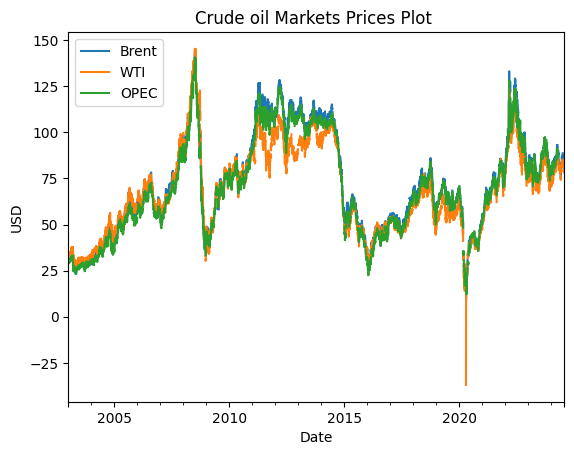

In [ ]:
df = pd.DataFrame(FFFF[["Brent","WTI","OPEC",]])
plot = df.plot(title="Crude oil Markets Prices Plot ")
plt.ylabel('USD')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

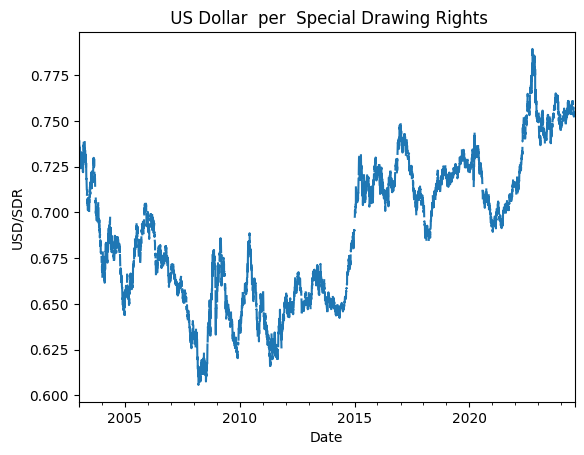

In [ ]:
dff =pd.Series(FFFF['USD_SDR'].astype(float))
plot1 = dff.plot(title=" US Dollar  per  Special Drawing Rights")
plt.ylabel('USD/SDR')
plt.show

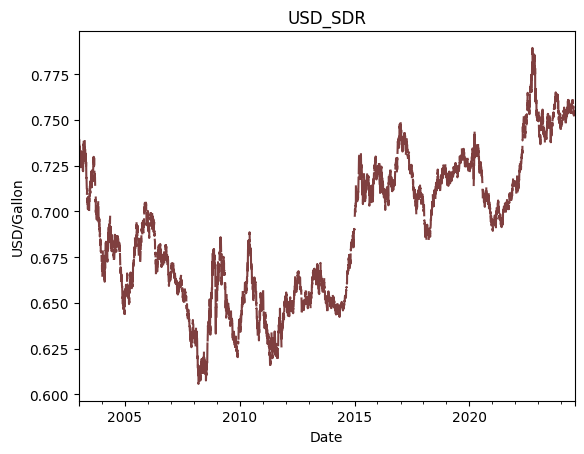

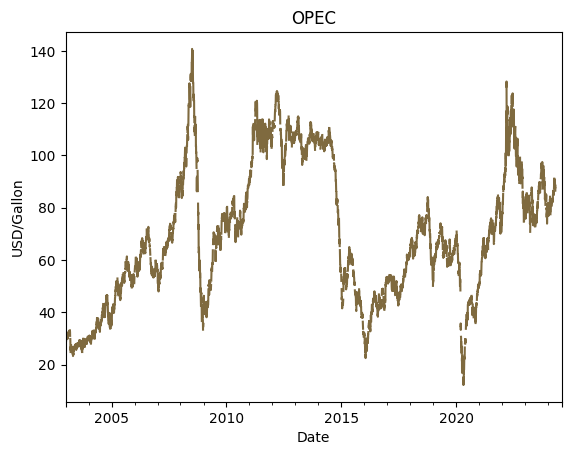

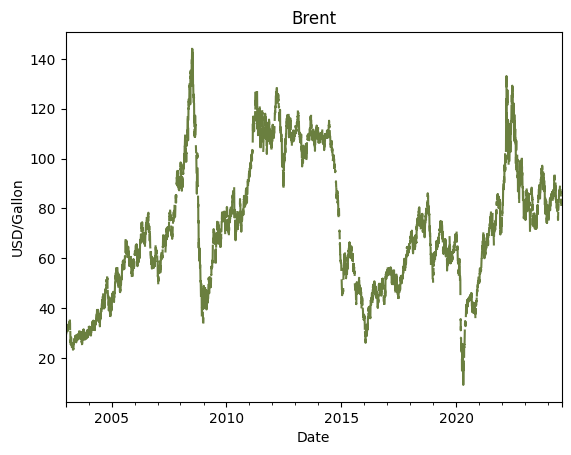

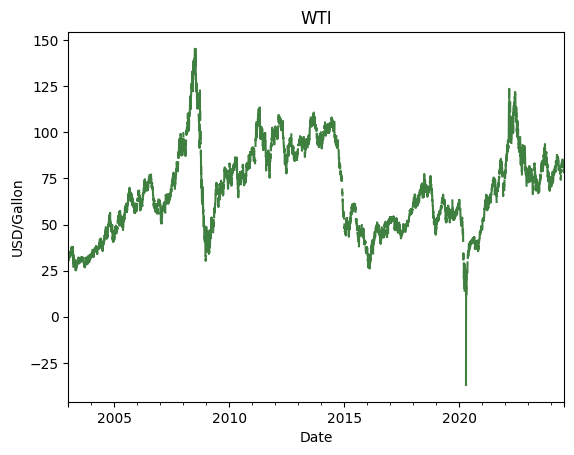

Column ('Date',) contains dates, skipping conversion to float.


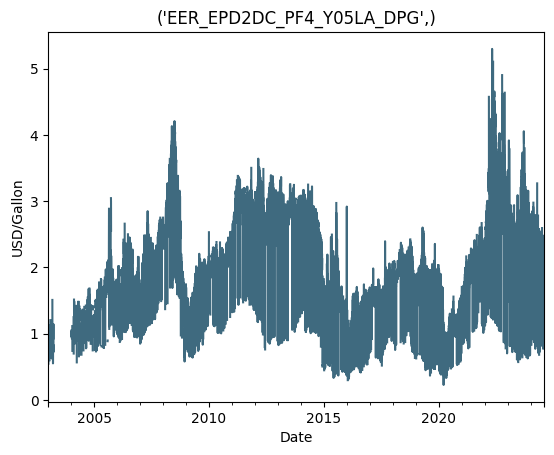

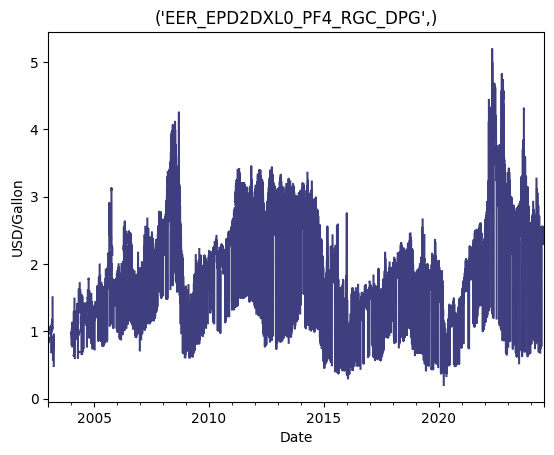

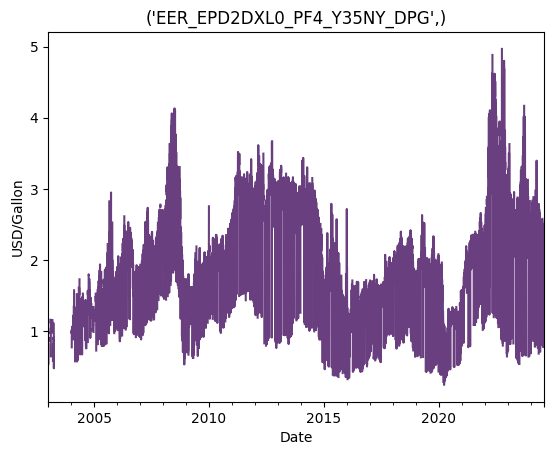

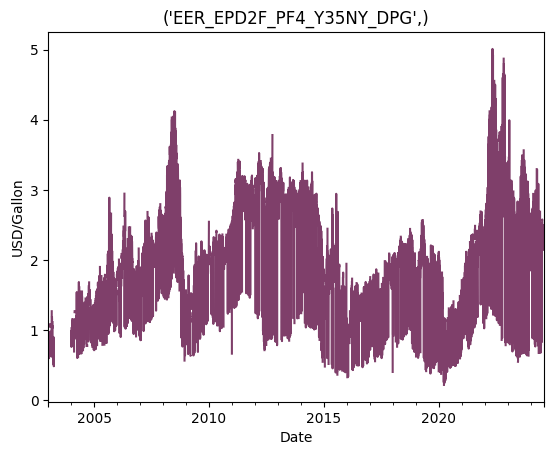

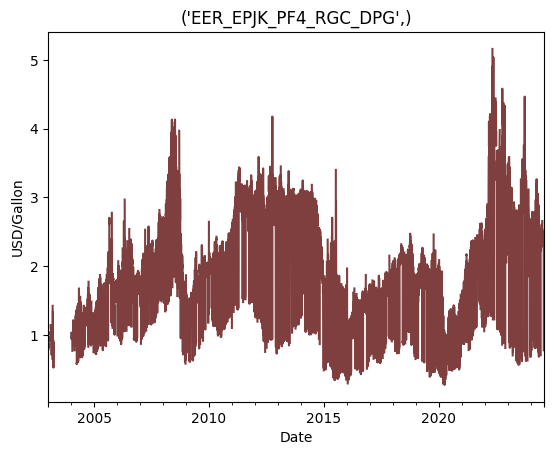

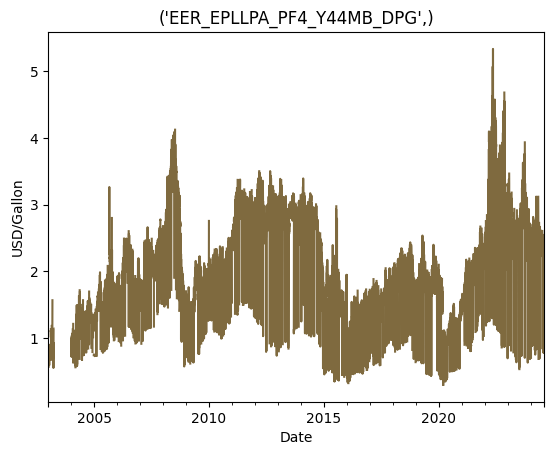

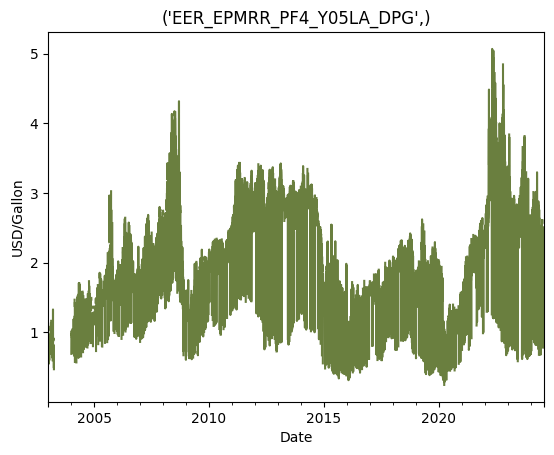

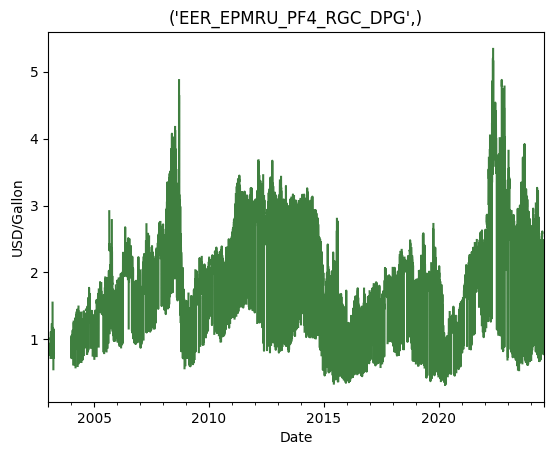

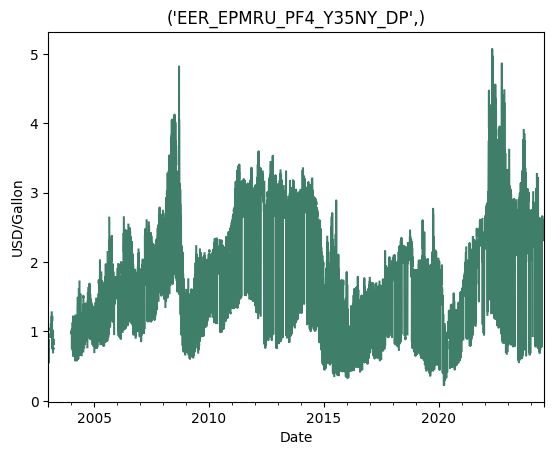

IndexError: single positional indexer is out-of-bounds

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import colorsys  # Import colorsys for color conversion

def get_N_HexCol(N=9):
    HSV_tuples = [(x * 1.0 / N, 0.5, 0.5) for x in range(N)]
    hex_out = []
    for rgb in HSV_tuples:
        rgb = map(lambda x: int(x * 255), colorsys.hsv_to_rgb(*rgb))
        hex_out.append('#%02x%02x%02x' % tuple(rgb))
    return hex_out

# Call the function to get the list of colors
color_sequences = get_N_HexCol()  # Now color_sequences holds the list of hex colors

for i in range(114):
    # Use .iloc for integer-location based indexing
    data = FFFF.iloc[:,i:i+1]

    # Check if the column contains datetime objects
    if pd.api.types.is_datetime64_any_dtype(data.iloc[:, 0]):
        print(f"Column {data.columns[0]} contains dates, skipping conversion to float.")
        continue  # Skip to the next iteration

    # Assuming FFFF is a DataFrame
    dffff = pd.Series(data.iloc[:, 0].astype(float))  # Extract the single column as a Series
    plot1 = dffff.plot(title=f"{data.columns[0]}", color=color_sequences[i % len(color_sequences)])  # Pass color to the plot function
    plt.ylabel('USD/Gallon')
    plt.show()